# Experiment: Comparing two samples of blood. 89 vs 189 mg/dL

**Date**: 05 Sep 2024 

**Sample**: Blood

## Data Collection
### Blood Samples

| Sample No. | Time             | Glycemic Level | Condition             |
|------------|------------------|----------------|-----------------------|
| 1          | In the morning   | 89 mg/dL       | Have not eat anything |
| 2          | In the afternoon | 189 mg/dL      | 1 hour after lunch    |

The blood sample was put on slit that is wrapped around with aluminum foil.

<img src="image/slideWAluFoil.jpg" alt="drawing" width="400"/>

### Glycemic Level Assessment

After collecting the blood samples, use glucose meter to measure the glycemic level directly with the blood on slit.

### Raman Spectra

| Name           | Value                   |
|----------------|-------------------------|
| slit           | 0.25                    |
| Grating        | 600                     |
| Laser          | 785 nm                  |
| Laser Power    | 5.7, 4.0 A, 30 mW       |
| Spectro Center | 1125 $\texttt{cm}^{-1}$ |
| Exposure Time  | 120 seconds             |
| Accumulation   | 5 times                 |

Total measurement time: 10 minutes

In [140]:
from raman_for_glucose_measurement.helper import create_data_from_paths, extract_range
import rampy as rp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path
from glob import glob 

In [141]:
DATA_BASE_PATH:Path = Path("../data/blood")
DATA_PATH:Path      = DATA_BASE_PATH.joinpath("98vs186")

# Load Data

In [142]:
paths:list[str] = glob(str(DATA_PATH.joinpath('*')))
data = create_data_from_paths(paths=paths)
def get_glycemic(row):
    return int(row['name'].lstrip('blood').rstrip('-40'))
data['glycemic'] = data.apply(get_glycemic, axis=1)
data

,path,spectrum,name,grating,laser,exposure,accumulation,datetime,glycemic
0,../data/blood/98vs186/blood101-40_600_785 nm_1...,"[[-1392.33, 128.8], [-1389.32, 126.2], [-1386....",blood101-40,600,785 nm,120 s,5,2024-09-06 10:48:10,101
1,../data/blood/98vs186/blood186-40_600_785 nm_1...,"[[-1392.33, 108.5], [-1389.32, 117.25], [-1386...",blood186-40,600,785 nm,120 s,5,2024-09-05 14:39:51,186
2,../data/blood/98vs186/blood123-40_600_785 nm_1...,"[[-1392.33, 126.0], [-1389.32, 125.4], [-1386....",blood123-40,600,785 nm,120 s,5,2024-09-06 13:54:47,123
3,../data/blood/98vs186/blood123-40_600_785 nm_1...,"[[-1392.33, 132.0], [-1389.32, 130.2], [-1386....",blood123-40,600,785 nm,120 s,5,2024-09-06 13:43:23,123
4,../data/blood/98vs186/blood101-40_600_785 nm_1...,"[[-1392.33, 130.4], [-1389.32, 136.8], [-1386....",blood101-40,600,785 nm,120 s,5,2024-09-06 11:13:34,101
5,../data/blood/98vs186/blood186-40_600_785 nm_1...,"[[-1392.33, 127.8], [-1389.32, 131.6], [-1386....",blood186-40,600,785 nm,120 s,5,2024-09-05 14:33:02,186
6,../data/blood/98vs186/blood186-40_600_785 nm_1...,"[[-1392.33, 121.2], [-1389.32, 130.8], [-1386....",blood186-40,600,785 nm,120 s,5,2024-09-05 14:10:31,186
7,../data/blood/98vs186/blood123-40_600_785 nm_1...,"[[-1392.33, 112.8], [-1389.32, 109.0], [-1386....",blood123-40,600,785 nm,120 s,5,2024-09-06 14:19:09,123
8,../data/blood/98vs186/blood186-40_600_785 nm_1...,"[[-1392.33, 113.2], [-1389.32, 118.4], [-1386....",blood186-40,600,785 nm,120 s,5,2024-09-05 14:22:58,186
9,../data/blood/98vs186/blood98-40_600_785 nm_12...,"[[-1392.33, 133.6], [-1389.32, 137.6], [-1386....",blood98-40,600,785 nm,120 s,5,2024-09-05 10:12:09,98


# Raw Raman Signal

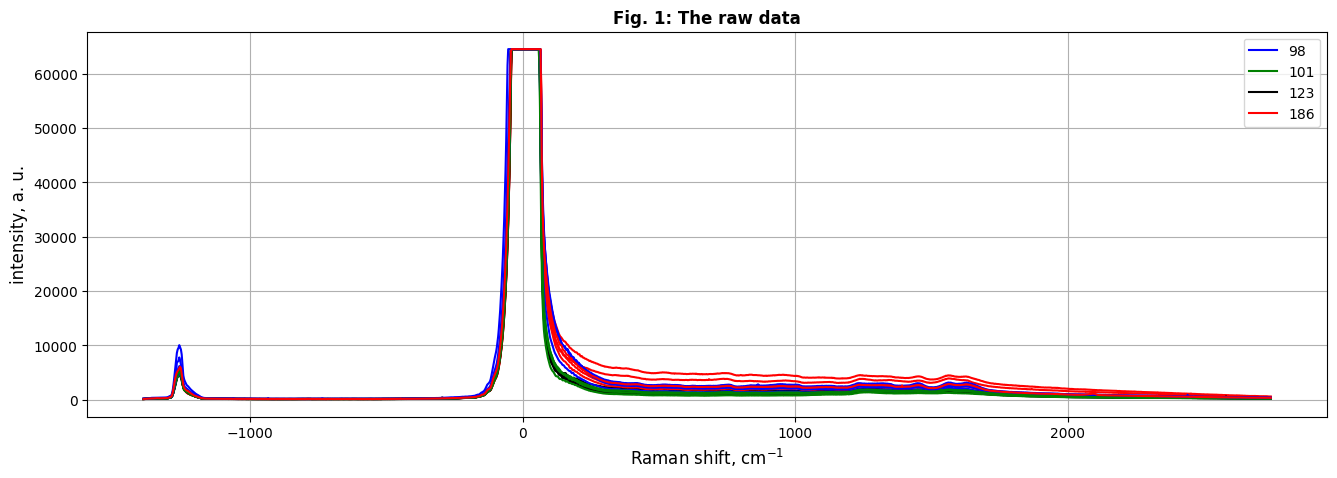

In [143]:
def plot(data:pd.DataFrame, title:str=""):
    colors = {
        98: 'blue',
        101: 'green',
        123: 'black',
        186: 'red',
    }

    plt.figure(figsize=(16,5))
    for index, row in data.iterrows():
        X = row.spectrum[:,0]
        y = row.spectrum[:,1]
        plt.plot(X,y, color=f"{colors[row.glycemic]}", label=f"{row.glycemic}")
    # Remove duplicate labels
    handles, labels = plt.gca().get_legend_handles_labels()
    labels, ids = np.unique(data.glycemic, return_index=True)
    handles = [handles[i] for i in ids]
    plt.legend(handles, labels, loc='best')

    plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 12)
    plt.ylabel("intensity, a. u.", fontsize = 12)
    plt.title(title,fontsize = 12,fontweight="bold")
    plt.grid()
    plt.show()

plot(data=data, title=f"Fig. 1: The raw data")


# Extract range

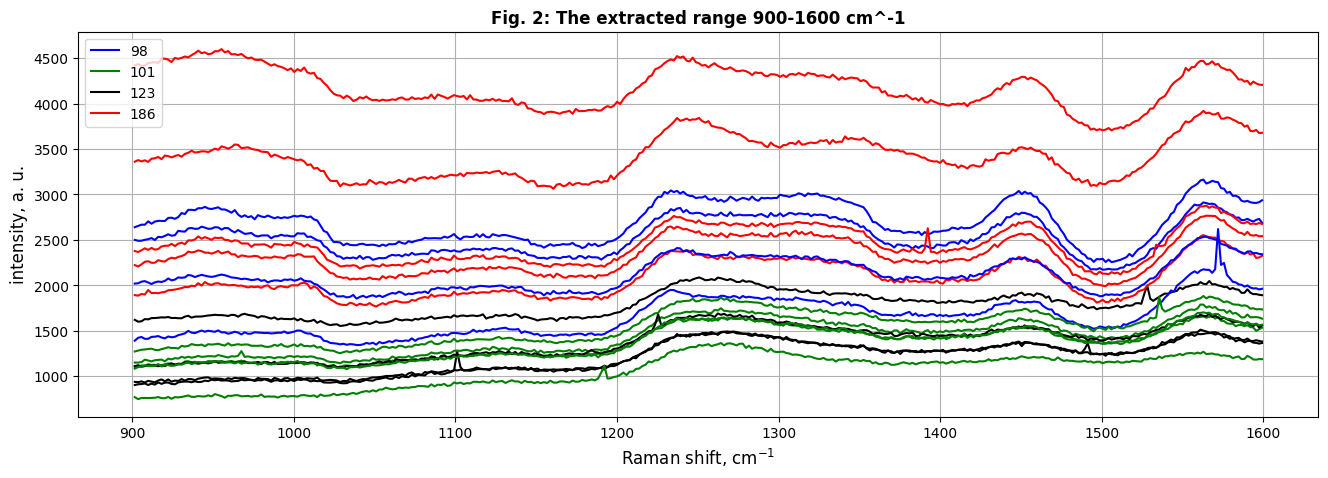

In [144]:
def cal_range(row):
    spectrum = row.spectrum
    return extract_range(spectrum=spectrum, range_from=900, range_to=1600)
data.spectrum = data.apply(cal_range, axis=1)

plot(data=data, title=f"Fig. 2: The extracted range 900-1600 cm^-1")

# Preprocessing

## 1. Despike

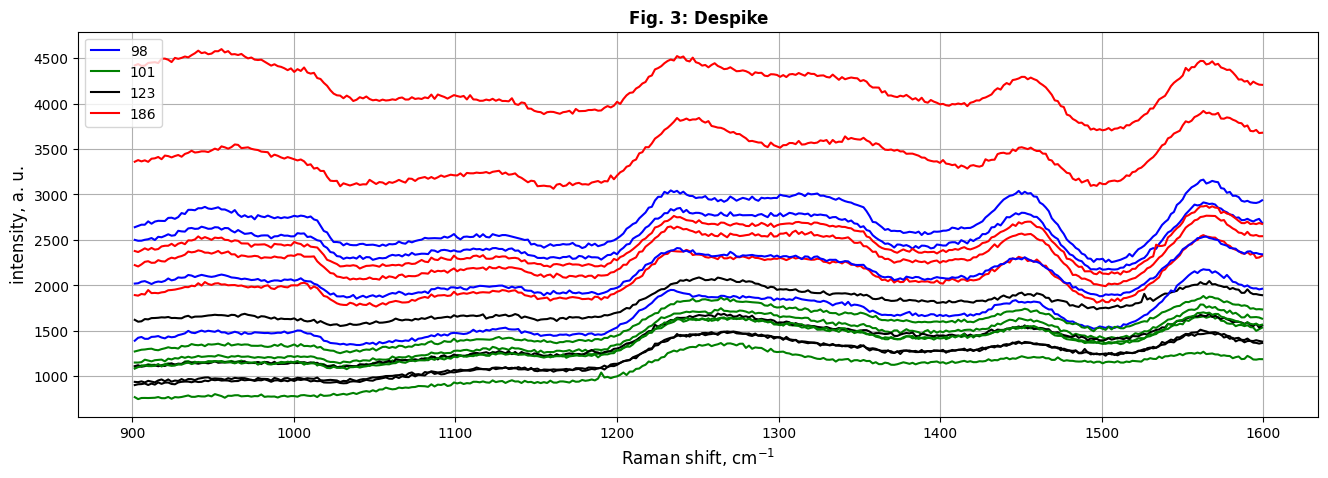

In [125]:
def despike(row):
    spectrum = row.spectrum
    spectrum[:,1] = rp.despiking(x=spectrum[:,0], y=spectrum[:,1])
    return spectrum
data.spectrum = data.apply(despike, axis=1)

plot(data=data, title=f"Fig. 3: Despike")

## 2. Normalization

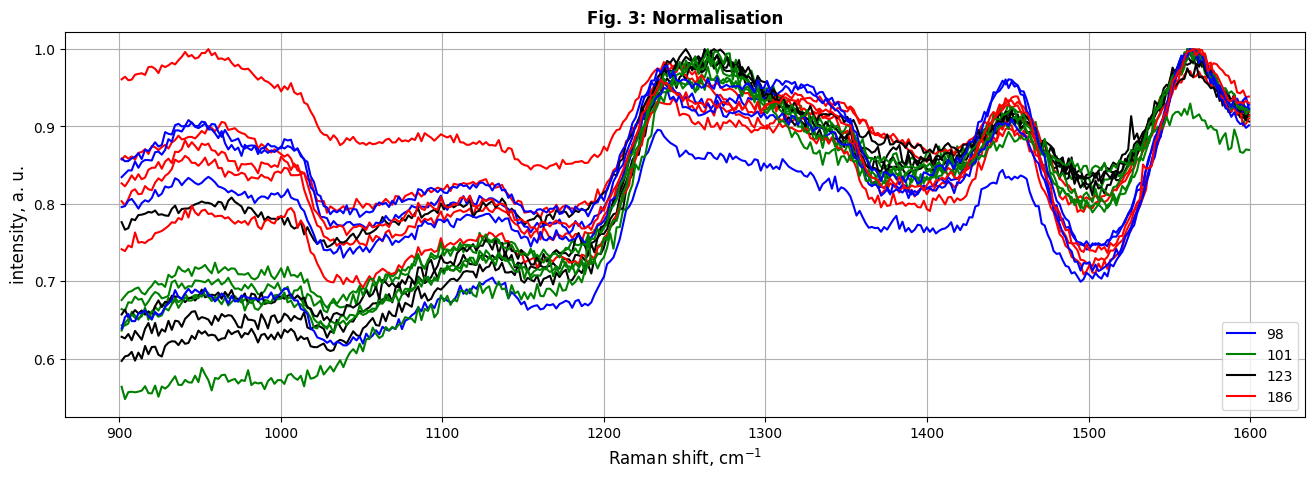

In [126]:
def normalisation(row):
    spectrum = row.spectrum
    # method : string
    # method used, choose between area, intensity, minmax
    spectrum[:,1] = rp.normalise(x=spectrum[:,0], y=spectrum[:,1], method="intensity")
    return spectrum
data.spectrum = data.apply(normalisation, axis=1)

plot(data=data, title=f"Fig. 3: Normalisation")

## 3. Smoothing

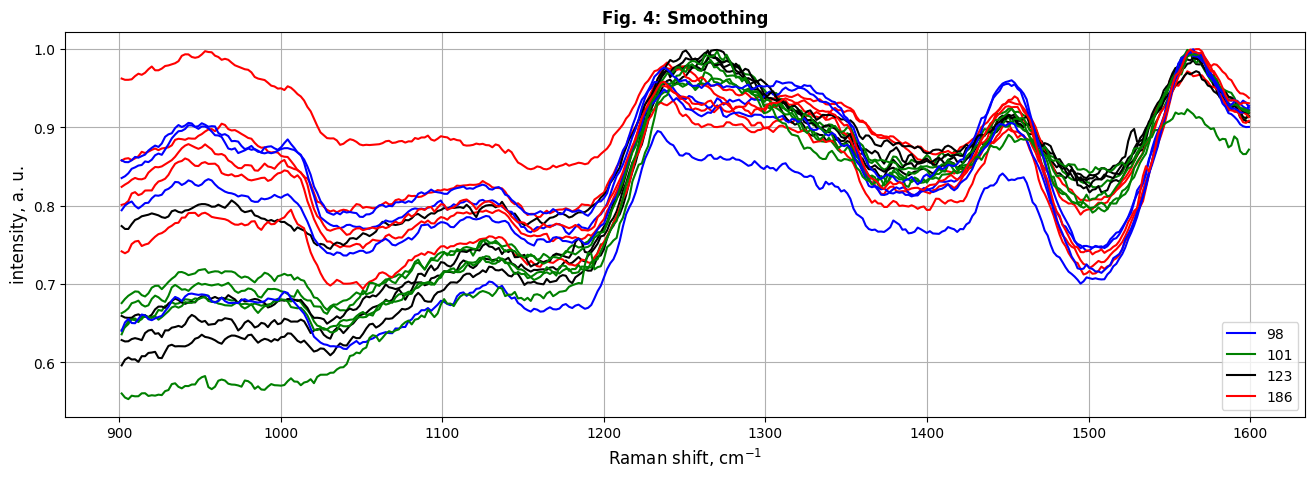

In [127]:
def smoothing(row):
    spectrum = row.spectrum
    spectrum[:,1] = rp.smooth(x=spectrum[:,0], y=spectrum[:,1], method="savgol", window_length=5, polyorder=2)
    return spectrum
data.spectrum = data.apply(smoothing, axis=1)

plot(data=data, title=f"Fig. 4: Smoothing")

## 4. Baseline Correction

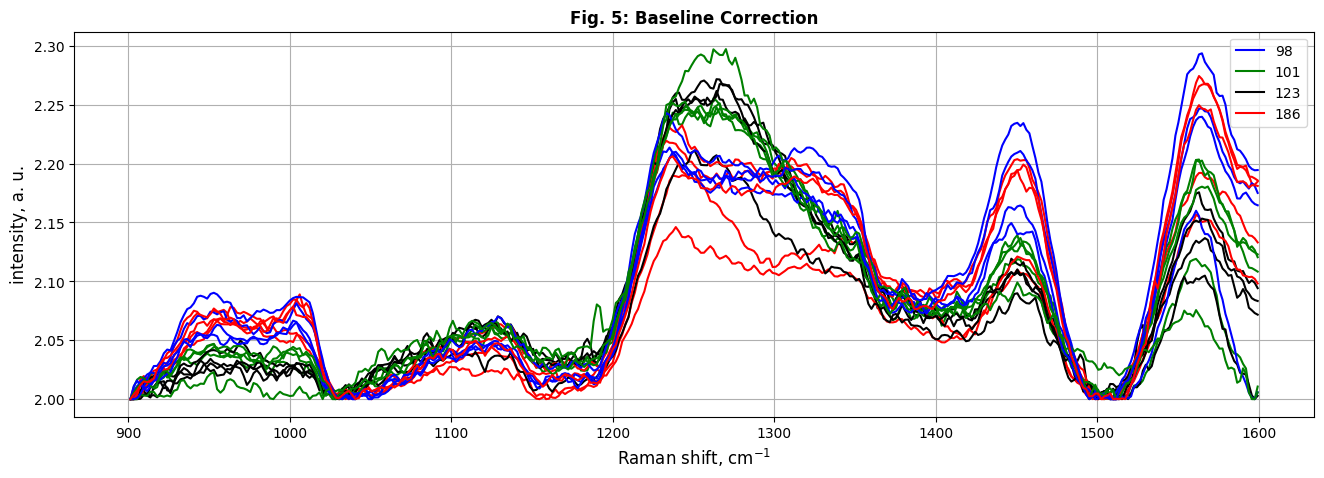

In [128]:
def baseline_correction(row):
    spectrum = row.spectrum
    # roi = np.array([[900,1000],[1000,1200],[1400,1500],[1550,1600]])
    roi = np.array([[1400, 1500]])
    ycalc, base = rp.baseline(x_input=spectrum[:,0], y_input=spectrum[:,1], bir=roi, method='rubberband')
    spectrum[:,1] = (spectrum[:,1] - base.reshape(-1)) + 2
    return spectrum

data.spectrum = data.apply(baseline_correction, axis=1)

plot(data=data, title=f"Fig. 5: Baseline Correction")

# Calculate Area Under the curve

In [145]:
# extract 1120 - 1130
def get_range(x:np.ndarray, range:tuple[float,float]) -> np.ndarray:
    cond1 = x > range[0]
    cond2 = x < range[1]
    return cond1 & cond2

def cal_auc(spectrum:np.ndarray, range:tuple[float,float]) -> np.float64:
    cond = get_range(x=spectrum[:,0], range=range)
    x = spectrum[cond, 0]
    y = spectrum[cond, 1]
    # print(x, y)
    return np.trapezoid(y=y, x=x)

def cal_auc_1125(row):
    spectrum = row.spectrum
    auc = cal_auc(spectrum=spectrum, range=(1120,1130))
    return auc

def cal_auc_1450(row):
    spectrum = row.spectrum
    auc = cal_auc(spectrum=spectrum, range=(1400,1500))
    return auc

data['1125'] = data.apply(cal_auc_1125, axis=1)
data['1450'] = data.apply(cal_auc_1450, axis=1)

In [146]:
def cal_ratio(row):
    return row['1125']/row['1450']

data['ratio'] = data.apply(cal_ratio, axis=1)

In [149]:
data

,path,spectrum,name,grating,laser,exposure,accumulation,datetime,glycemic,1125,1450,ratio
0,../data/blood/98vs186/blood101-40_600_785 nm_1...,"[[901.521, 1103.6], [903.595, 1100.4], [905.66...",blood101-40,600,785 nm,120 s,5,2024-09-06 10:48:10,101,9951.622,141545.7700,0.070307
1,../data/blood/98vs186/blood186-40_600_785 nm_1...,"[[901.521, 3359.75], [903.595, 3377.5], [905.6...",blood186-40,600,785 nm,120 s,5,2024-09-05 14:39:51,186,25820.910,323914.2525,0.079715
2,../data/blood/98vs186/blood123-40_600_785 nm_1...,"[[901.521, 902.2], [903.595, 911.0], [905.669,...",blood123-40,600,785 nm,120 s,5,2024-09-06 13:54:47,123,8602.064,127150.6760,0.067653
3,../data/blood/98vs186/blood123-40_600_785 nm_1...,"[[901.521, 937.2], [903.595, 934.2], [905.669,...",blood123-40,600,785 nm,120 s,5,2024-09-06 13:43:23,123,8668.278,126742.6430,0.068393
4,../data/blood/98vs186/blood101-40_600_785 nm_1...,"[[901.521, 1150.0], [903.595, 1149.6], [905.66...",blood101-40,600,785 nm,120 s,5,2024-09-06 11:13:34,101,10392.101,148474.9340,0.069992
5,../data/blood/98vs186/blood186-40_600_785 nm_1...,"[[901.521, 4419.2], [903.595, 4434.6], [905.66...",blood186-40,600,785 nm,120 s,5,2024-09-05 14:33:02,186,32118.428,391943.2930,0.081947
6,../data/blood/98vs186/blood186-40_600_785 nm_1...,"[[901.521, 2222.0], [903.595, 2207.2], [905.66...",blood186-40,600,785 nm,120 s,5,2024-09-05 14:10:31,186,17441.680,226288.7700,0.077077
7,../data/blood/98vs186/blood123-40_600_785 nm_1...,"[[901.521, 1619.8], [903.595, 1599.4], [905.66...",blood123-40,600,785 nm,120 s,5,2024-09-06 14:19:09,123,13213.445,177904.9450,0.074272
8,../data/blood/98vs186/blood186-40_600_785 nm_1...,"[[901.521, 1892.2], [903.595, 1886.0], [905.66...",blood186-40,600,785 nm,120 s,5,2024-09-05 14:22:58,186,15377.240,203595.5980,0.075528
9,../data/blood/98vs186/blood98-40_600_785 nm_12...,"[[901.521, 2639.4], [903.595, 2653.2], [905.66...",blood98-40,600,785 nm,120 s,5,2024-09-05 10:12:09,98,20264.366,261883.3470,0.077379


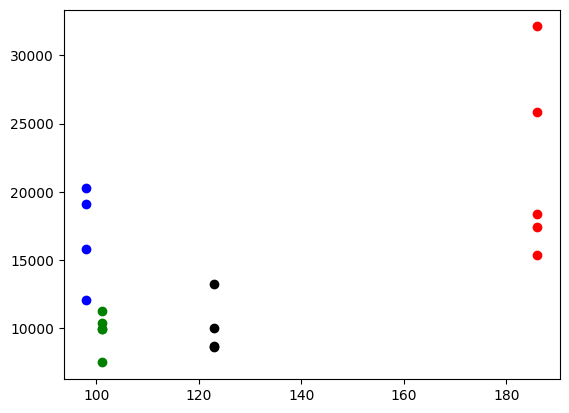

In [147]:
colors = {
    98: 'blue',
    101: 'green',
    123: 'black',
    186: 'red',
}
for key, value in colors.items():
    cond = (data.glycemic == key)
    plt.scatter(data.glycemic[cond], data['1125'][cond], color=value)
plt.show()

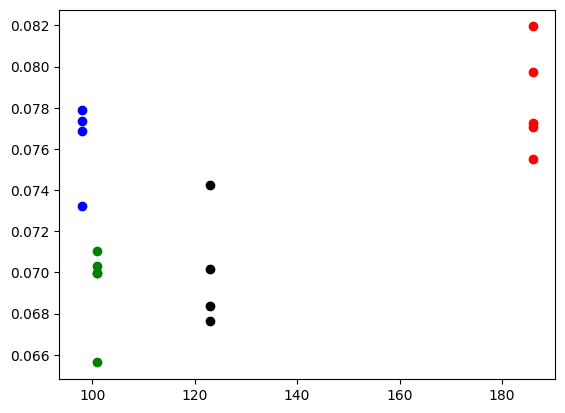

In [148]:
for key, value in colors.items():
    cond = (data.glycemic == key)
    plt.scatter(data.glycemic[cond], data['ratio'][cond], color=value)
plt.show()